# Info

This script analyzes TPD data. 

Uses:
- lmfit
- igor


-----------------------
Created by Jerry LaRue, larue@chapman.edu, 12/2018

Last modified by Jerry LaRue, larue@chapman.edu, 07/2019

# Select file

In [1]:
import numpy as np
import igor.igorpy as igor
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, Layout
from IPython.display import clear_output
import math

##### Definitions #####

def FileList() :
    return [f for f in listdir(FolderPath.value) if isfile(join(FolderPath.value, f))]

def TrimData(Data, MinValue) :
    i = 0
    Index = list()
    Data_Flattened = np.array([])
    while i < len(Data) :
        Data_Flattened = np.append(Data_Flattened, np.sum(Data[i]))
        if np.sum(Data[i]) > np.sum(Data[-1]) :
            Index.append(i)
        i+=1
    return Index, Data_Flattened

##### Select file #####

FolderPath = widgets.Text(
    value='..',
    placeholder='Type file path',
    description='Folder',
    layout=Layout(width='80%'),
    style = {'description_width': '150px'},
    disabled=False
)

FileName = widgets.Dropdown(
    options=FileList(),
    description='File',
    layout=Layout(width='80%'),
    style = {'description_width': '150px'},
    disabled=False,
)

def UpdateFileList(b) :
    FolderPath.value = FolderPath.value.replace('\\','/')
    FileName.options = FileList()

NumberChannels = widgets.BoundedFloatText(
    value=1,
    min=1,
    max=20,
    step=1,
    description='Number of Channels',
    layout=Layout(width='22%'),
    style = {'description_width': '150px'},
    disabled=False
)

TemperatureChannel = widgets.BoundedFloatText(
    value=2,
    min=1,
    max=20,
    step=1,
    description='Temperature Channel',
    layout=Layout(width='22%'),
    style = {'description_width': '150px'},
    disabled=False
)

button_UpdateFileList = widgets.Button(description="Update")
button_UpdateFileList.on_click(UpdateFileList)

display(widgets.Box([FolderPath,button_UpdateFileList]))
display(FileName)
display(NumberChannels,TemperatureChannel)

Box(children=(Text(value='..', description='Folder', layout=Layout(width='80%'), placeholder='Type file path',…

Dropdown(description='File', layout=Layout(width='80%'), options=('2018.10 Methanol and Oxygen on Ni(111) Anal…

BoundedFloatText(value=1.0, description='Number of Channels', layout=Layout(width='22%'), max=20.0, min=1.0, s…

BoundedFloatText(value=2.0, description='Temperature Channel', layout=Layout(width='22%'), max=20.0, min=1.0, …

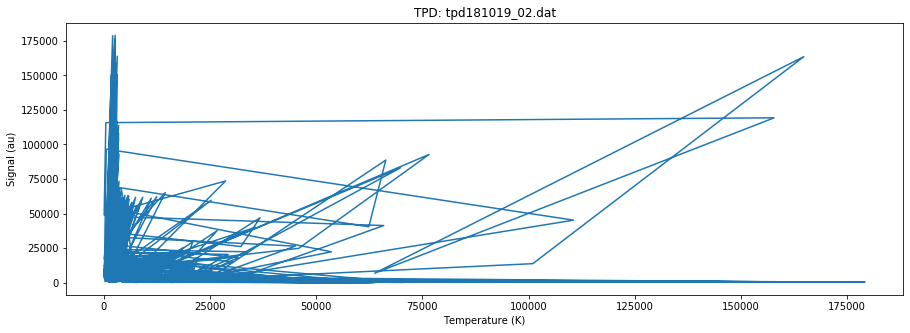

Box(children=(BoundedFloatText(value=100.0, description='Initial Temperature (K)', layout=Layout(width='25%'),…

Box(children=(BoundedFloatText(value=5.0, description='Heating Rate (K/s)', layout=Layout(width='25%'), min=0.…

Box(children=(BoundedFloatText(value=1.0, description='Desorption Barrier (eV)', layout=Layout(width='25%'), m…

In [2]:
import struct

##### Check file #####

if FileName.value == None :
    raise HaltException('Please select file')

with open(FolderPath.value + '/' + FileName.value, mode='rb') as file:
    fileContent = file.read()

Channels = NumberChannels.value + 1
TempChan = int(TemperatureChannel.value)
Header = 31
DataLength = int((len(fileContent)-5)/(46*Channels))

Data = np.zeros((int(1+Channels),DataLength))

# Read data from binary
i = 0
while i < len(Data) :
    j = 0
    while j < len(Data[0]) :
        if i == 0 :
            index = int(31+j*46*Channels)
            Data[i,j] = struct.unpack('<d', fileContent[index:index+8])[0]/1000
        else :
            index = int(43+j*46*Channels + (i-1)*46)
            Data[i,j] = struct.unpack('<d', fileContent[index:index+8])[0]
        j+=1
    i+=1

# Plot data
fig = plt.figure(figsize=(15,5))
i = 1
while i < len(Data) :
    if i != TempChan :
        j = 0
        while j < len(Data[TempChan]) :
            if Data[TempChan][j] > 115 :
                Start = j
                j = len(Data[TempChan])
            j += 1
        plt.plot(Data[TempChan][Start:], Data[i][Start:], '-', label=i-1)
    i+=1
plt.title('TPD: '+FileName.value)
# plt.legend()
plt.xlabel('Temperature (K)'), plt.ylabel('Signal (au)')
plt.show()

InitialTemperature = widgets.BoundedFloatText(
    value=100,
    min=0,
    max=1000,
    step=1,
    description='Initial Temperature (K)',
    layout=Layout(width='25%'),
    style = {'description_width': '170px'},
    disabled=False
)

FinalTemperature = widgets.BoundedFloatText(
    value=1000,
    min=0,
    max=1000,
    step=1,
    description='Final Temperature (K)',
    layout=Layout(width='30%'),
    style = {'description_width': '160px'},
    disabled=False
)

StepSize = widgets.BoundedFloatText(
    value=0.1,
    min=0,
    max=10,
    step=0.1,
    description='Step Size (s)',
    layout=Layout(width='28%'),
    style = {'description_width': '160px'},
    disabled=False
)

HeatingRate = widgets.BoundedFloatText(
    value=5,
    min=0.1,
    max=100,
    step=0.1,
    description='Heating Rate (K/s)',
    layout=Layout(width='25%'),
    style = {'description_width': '170px'},
    disabled=False
)

InitialCoverage = widgets.BoundedFloatText(
    value=1,
    min=0,
    max=1,
    step=0.01,
    description='Initial Coverage',
    layout=Layout(width='30%'),
    style = {'description_width': '160px'},
    disabled=False
)

ScalingFactor = widgets.BoundedFloatText(
    value=10000000,
    min=0,
    max=1000000000,
    step=0.1,
    description='Scaling Factor',
    layout=Layout(width='28%'),
    style = {'description_width': '160px'},
    disabled=False
)

DesorptionBarrier = widgets.BoundedFloatText(
    value=1,
    min=0,
    max=10,
    step=0.01,
    description='Desorption Barrier (eV)',
    layout=Layout(width='25%'),
    style = {'description_width': '170px'},
    disabled=False
)

Prefactor = widgets.BoundedFloatText(
    value=1e6,
    min=0,
    max=1e10,
    step=1,
    description='Prefactor (Hz)',
    layout=Layout(width='30%'),
    style = {'description_width': '160px'},
    disabled=False
)

ReactionOrder = widgets.BoundedFloatText(
    value=1,
    min=1,
    max=2,
    step=1,
    description='Reaction Order',
    layout=Layout(width='28%'),
    style = {'description_width': '160px'},
    disabled=False
)

display(widgets.Box([InitialTemperature,FinalTemperature,StepSize]))
display(widgets.Box([HeatingRate,InitialCoverage,ScalingFactor]))
display(widgets.Box([DesorptionBarrier,Prefactor,ReactionOrder]))


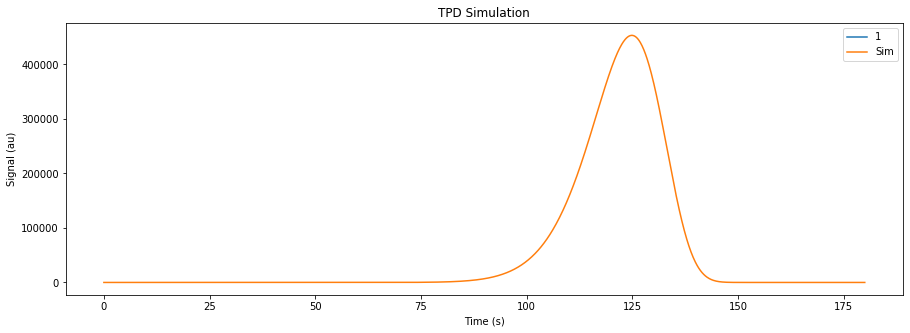

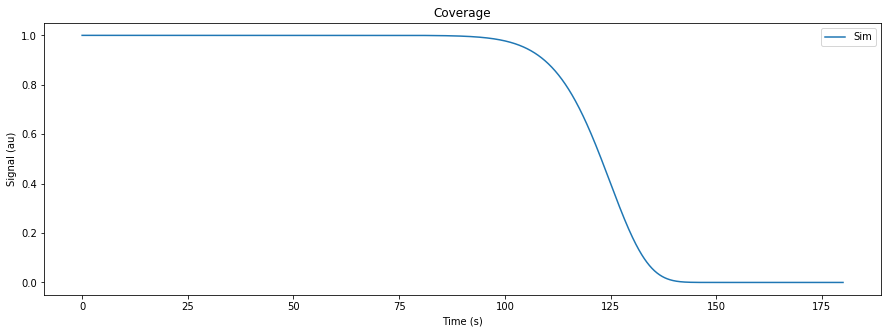

In [3]:
kB = 8.617e-5                 # eV/K
IntRate=0

Ti = InitialTemperature.value
Tf = FinalTemperature.value
Step = StepSize.value
Rate = HeatingRate.value
Ni = InitialCoverage.value
Ea = DesorptionBarrier.value
nu = Prefactor.value
n = ReactionOrder.value

Size = int((Tf-Ti)/(Rate*Step))+1
Temperature = np.zeros((Size))
Time = np.zeros((Size))
Trace = np.zeros((Size))
Coverage = np.zeros((Size))

i = 0
while i < len(Temperature) :
    Time[i] = Step * i
    Temperature[i] = Ti + Rate * Step * i
    Trace[i] = nu*(Ni - IntRate)**n * math.exp(-Ea/(kB*Temperature[i]))
    IntRate += Trace[i] * Step
    Coverage[i] = Ni - IntRate
    if Coverage[i] < 0 :
        Coverage[i] = 0
        Trace[i] = 0
    i += 1

fig = plt.figure(figsize=(15,5))
i = 1
while i < len(Data) :
    plt.plot(Data[0], Data[i], '-', label=i)
    i += 1
plt.plot(Time, Trace*ScalingFactor.value, '-', label='Sim')
plt.title('TPD Simulation')
plt.legend(), plt.xlabel('Time (s)'), plt.ylabel('Signal (au)')
plt.show()

fig = plt.figure(figsize=(15,5))
plt.plot(Time, Coverage, '-', label='Sim')
plt.title('Coverage')
plt.legend(), plt.xlabel('Time (s)'), plt.ylabel('Signal (au)')
plt.show()